# Actividad Evaluación de modelos

Link para crear el repositorio: https://classroom.github.com/a/jZ3onS79


## Introducción




En esta actividad, usted va a evaluar 3 modelos aprendidos en clases: Random Forest, Knn y Regresión Logística. Luego, vamos a seleccionar, justificadamente, el mejor modelo frente a una tarea de clasificación. 

Para esta actividad, vamos a seguir un _pipeline_ de dividir el dataset en 2 conjuntos y utilizar la técnica de _cross validation_ para encontrar los mejores parámetros por modelo. Por otro lado, en esta actividad se espera que usted pueda familiarizarse más con la documentación de [scikit-learn](https://scikit-learn.org/).

A continuación se muestra una imagen de referencia que describe el proceso a relizar en esta actividad.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="crossvalidation" width="70%">




### Base de datos

La base de datos a utilizar corresponde a mediciones de diversas características del aire para definir si la calidad del aire (`Air_quality`) es 'Moderate' 'Poor' 'Very Poor' 'Satisfactory' 'Good' 'Severe'. Para esta actividad, vamos a contruir modelos que sean capaces de tomar las características del aire y clasificarla según su calidad, es decir, la columna a predecir será `Air_quality`.




## Actividad

In [41]:
# Librerías básicas para la actividad. Puede prescindir de algunas o añadir más si lo requiere.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
DATA_URL = "https://raw.githubusercontent.com/IIC2433/Syllabus-2020-2/master/Actividades/AC06/data.csv"

In [3]:
data = pd.read_csv(DATA_URL)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


Como podrás notar, hay filas que tienen `NaN`. Además tenemos columnas que no son datos sobre el aire como la ciudad y la fecha. Finalmente los datos no están normalizados. Por lo tanto, **debe partir realizando un pequeño pre-procesamiento**:
1. Debe eliminar las columnas "City" y "Date".
2. Debe eliminar las filas que tienen `NaN`.
3. Obtener X, Y. En otras palabras, separar el dataset entre las columnas para entrenar (X) y la columna a predecir (Y).
3. Debe normalizar las columnas que serán usadas para entrenar los modelos. No es necesario implementar a mano la normalización, puede utilizar alguna librería.

In [7]:

preprocessed = data.drop('City', axis=1).drop('Date', axis=1)
preprocessed = preprocessed.dropna()
X, Y = preprocessed.drop('Air_quality', axis=1), preprocessed['Air_quality']
X = X.apply(lambda x: (x - x.min())/(x.max()-x.min()))

### División del dataset

Para evaluar un dataset, es muy recomendado construir 2 conjuntos: uno de entrenamiento y otro para testear. El primero se usa para que el modelo aprenda del mundo, mientras que el segundo se utiliza para el reporte de datos y testear que tanto logró generalizar el modelo.

Lo primero que debe hacer en esta actividad es separar los datos en ambos conjuntos con una separación de 70% train y 30% test. Además, **debe asegurar que sea una división estratificada**. Este tipo de división se asegura que la proporción de clases del dataset original se mantenga lo mejor posible en los 2 conjuntos. 


Por ejemplo, si tenemos 2 clases con la siguiente distribución (75% son clase 0 y 25% son clase 1). Una separación estratifica intentará que tanto el conjunto de entrenamiento como el de test tambien tengan 75% de la clase 1 y 25% de la clase 2 cada uno. Una separación aleatoria puede provocar que esa distribución se pierda, por ejemplo, dejando 90% de la clase 0 y 10% de la clase 1 en alguno de los conjuntos.



_Hint_: [`train_test_split` de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) les será de mucha utilidad.

In [13]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### Calibración de modelos

A continuación vamos a calibrar los 3 modelos indicados anteriormente: Random Forest, Knn y Regresión Logística.

Algunos modelos presentan hiper-parámetros los cuales influyen fuertemente en la eficiencia del modelo. Por lo tanto, en esta sección, deberán utilizar la técnica de _cross validation_ para encontrar los mejores hiper-parámetros. Cómo **mínimo**, se pide que **se prueben 2 alternativas de hiper-parámetros** y mediante _cross validation_ decidir cual hiper-parámetro fue mejor. Debe utilizar **5 folds** tal como sale en la imagen de referencia.

_Hint_: [`cross_val_score` de sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) les será de mucha utilidad para aplicar _cross validation_ y [la siguiente tabla](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values) tiene un listado de posibles métricas para pedirle a `cross_val_score` que retorne (revisar el argumento _scoring_). Puede utilizar la que usted desee que sirva para clasificación.

_Hint2_: cuando pruebe el modelo de Regresión logística, si aparece el siguiente warning **_STOP: TOTAL NO. of ITERATIONS REACHED LIMIT_**, se recomienda cambiar los argumentos _solver_ o _max_iter_ del modelo. Revisen la documentación para ver cuales son otros valores posibles para el _solver_. 

In [31]:
# Modelo 1 - Alternativa hiper parámetros 1 - Distancia Manhattan
k_vecinos_1 = KNeighborsClassifier(p=1)
k_vecinos_1.fit(X_train, Y_train)

# Usaremos accuracy
scores = cross_val_score(k_vecinos_1, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.83717358 0.86789555 0.84615385 0.82307692 0.85692308]
0.8462445941155619


In [32]:
# Modelo 1 - Alternativa hiper parámetros 2 - Nº vecinos = 10
k_vecinos_2 = KNeighborsClassifier(n_neighbors=10)
k_vecinos_2.fit(X_train, Y_train)
scores = cross_val_score(k_vecinos_2, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.82334869 0.86635945 0.83230769 0.81076923 0.84307692]
0.8351723974949781


Obtenemos como resultado que la primera alternativa de hiper-parámetros es la mejor entre las dos.

In [33]:
# Modelo 2 - Alternativa hiper parámetros 1 - Clases balanceadas
reg_log_1 = LogisticRegression(class_weight='balanced')
reg_log_1.fit(X_train, Y_train)
scores = cross_val_score(reg_log_1, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.69892473 0.71889401 0.70307692 0.66307692 0.72769231]
0.702332978849108


In [38]:
# Modelo 2 - Alternativa hiper parámetros 2 - 
# Usando el algoritmo Newton-Conjugate-Gradient para resolver el problema de optimización
reg_log_2 = LogisticRegression(solver='newton-cg')
reg_log_2.fit(X_train, Y_train)
scores = cross_val_score(reg_log_2, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.76651306 0.75576037 0.74       0.73230769 0.74307692]
0.7475316081767696


Obtenemos como resultado que la segunda alternativa de hiper-parámetros es la mejor entre las dos.

In [39]:
# Modelo 3 - Alternativa hiper parámetros 1 - Criterio entropía
rand_forest_1 = RandomForestClassifier(criterion='entropy')
rand_forest_1.fit(X_train, Y_train)
scores = cross_val_score(rand_forest_1, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.99231951 0.9969278  0.99538462 0.98923077 0.99538462]
0.9938494623655915


In [40]:
# Modelo 3 - Alternativa hiper parámetros 2 - 150 estimadores
rand_forest_2 = RandomForestClassifier(n_estimators=150)
rand_forest_2.fit(X_train, Y_train)
scores = cross_val_score(rand_forest_2, X_train, Y_train, cv=5, scoring='accuracy')
print(scores)
print(np.mean(scores))

[0.99539171 0.9984639  0.99538462 0.99230769 0.99538462]
0.9953865059671511


Obtenemos como resultado que la segunda alternativa de hiper-parámetros es la mejor entre las dos.

### Comparación de modelos

Hay diferentes formas y herramientas para comparar modelos de clasificación, entre ellas una de las más utilizadas es la **matriz de confusión**:


Una matriz de confusión es una herramienta de visualización que permite analizar el desempeño de un algoritmo de clasificación. Generalmente, cada fila de la matriz representará el valor real de la **clase** y cada columna la **predicción** que se hizo sobre dicha clase.

<img src="https://i.stack.imgur.com/bYbgo.png" alt="confussionmatrix" width="60%">


Como último punto, a partir de la distribución de filas y columnas, podemos apreciar que la **diagonal formada contendrá las "clasificaciones bien hechas"** que hizo nuestro algoritmo.


A continuación, gráfique una matriz de confusión para cada uno de los modelos de la sección anterior. Recuerde que primero debe entrenar el modelo con el conjunto de entrenamiento y con los mejores hiper-parámetros encontrados en la calibración. Luego, debe predecir el set de test y formar la matriz de confusión con las predicciones realizadas del set de test y la etiqueta real.

_Hint_: Matplotlib o seaborn les puede ser de utilidad para hacer los gráfico. Otra opción es investigar sobre la función [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).


In [45]:
# una de las librerías más utilizadas para plotear esta matriz es seaborn
# puede usar otra si lo desea
import seaborn as sbn

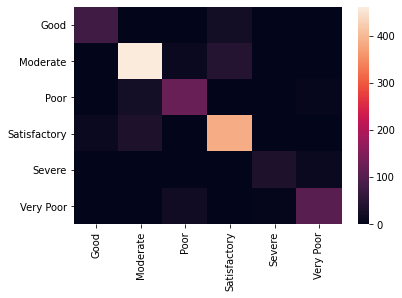

In [48]:
# Grafico modelo 1 con mejores hiper-parámetros
k_vecinos = KNeighborsClassifier(p=1)
k_vecinos.fit(X_train, Y_train)
predicted = k_vecinos.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
labels = sorted(Y_test.unique())
sbn.heatmap(matrix, xticklabels=labels, yticklabels=labels)


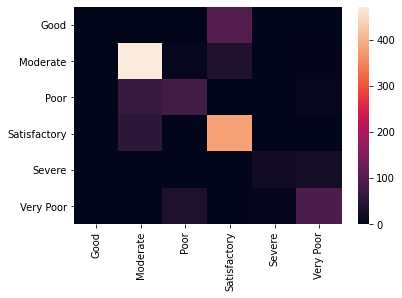

In [49]:
# Grafico modelo 2 con mejores hiper-parámetros
reg_log = LogisticRegression(solver='newton-cg')
reg_log.fit(X_train, Y_train)
predicted = reg_log.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
labels = sorted(Y_test.unique())
sbn.heatmap(matrix, xticklabels=labels, yticklabels=labels)

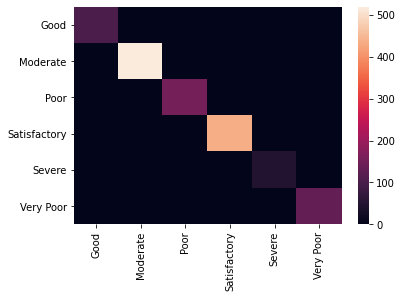

In [50]:
# Grafico modelo 3 con mejores hiper-parámetros
rand_forest = RandomForestClassifier(n_estimators=150)
rand_forest.fit(X_train, Y_train)
predicted = rand_forest.predict(X_test)
matrix = confusion_matrix(Y_test, predicted)
labels = sorted(Y_test.unique())
sbn.heatmap(matrix, xticklabels=labels, yticklabels=labels)

Finalmente, existen distintas métricas estadísticas que se pueden utilizar para comparar modelos de forma númerica, en esta actividad nos centraremos en: [**_accuracy_**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) y [**_f1 score_**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

- *Accuracy*: Mide la cantidad relativa de veces que el modelo ha acertado en la predicción de las clases. En la matriz de confusión se puede ver como el número de elementos en la diagonal dividivo por el número total de predicciones.

- *F1 Score*: Es una combinación de otras dos métricas: *precision* y *recall*. Generalmente, existe un *tradeoff* entre ambas métricas, por lo que es útil definir un solo valor, conocido como la media harmónica entre ambas:

$$ F_{\beta} = \frac{2 * Precision * Recall}{Presicion + Recall}$$


Si bien pueden hacer la implementación de ambas métricas, para esta actividad pueden utilizar la librería ```sklearn```, donde encontrarán varias métricas de compración. Deberán hacer una comparación del valor que toman estas métricas en las clasificaciones que hizo cada uno de los anteriores modelos con los mejores hiper-parámetros. Luego, deberá realizar un comentario sobre este.

**Importante**: La función `f1_score` tiene por defecto lo que las predicciones son de un modelo binario (solo responde 1 o 0), pero este este modelo es multiclase (6 clases posibles). Por lo tanto, cuando calcule `f1_score`, debe cambiar el argumento `average` por "_macro_". En otro caso, se va a calcular la métrica como el promedio pensando que es un modelo binario y va a generar un error.

In [52]:
# importamos ambas métricas
from sklearn.metrics import accuracy_score, f1_score

In [55]:
# calcular métricas modelo 1 con mejor hiper parámetros
k_vecinos = KNeighborsClassifier(p=1)
k_vecinos.fit(X_train, Y_train)
predicted = k_vecinos.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted))
print('F1 Score:', f1_score(Y_test, predicted, average='macro'))

Accuracy: 0.8565279770444764
F1 Score: 0.8331686734668478


In [56]:
# calcular métricas modelo 2 con mejor hiper parámetros
reg_log = LogisticRegression(solver='newton-cg')
reg_log.fit(X_train, Y_train)
predicted = reg_log.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted))
print('F1 Score:', f1_score(Y_test, predicted, average='macro'))

Accuracy: 0.7517934002869441
F1 Score: 0.5861042821871361


In [57]:
# calcular métricas modelo 3 con mejor hiper parámetros
rand_forest = RandomForestClassifier(n_estimators=150)
rand_forest.fit(X_train, Y_train)
predicted = rand_forest.predict(X_test)
print('Accuracy:', accuracy_score(Y_test, predicted))
print('F1 Score:', f1_score(Y_test, predicted, average='macro'))

Accuracy: 0.9978479196556671
F1 Score: 0.995259521726564


**Comentar** ¿Cuál modelo tuvo mejor accuracy? ¿Con cuanta diferencia con los demás? ¿Cuál modelo tuvo mejor f1-score? ¿Con cuanta diferencia con los demás?

El modelo con mejor *accuracy* fue *Random Forest* (cerca de 100%!), superando a KNN por cerca de 14% (KNN tuvo ~85%), y a Regresión Logística por cerca de 24% (tuvo ~75%).

El modelo con mejor f1-score también fue *Random Forest* (cerca de 100% 😱 ), superando a KNN por cerca de 16% (tuvo ~83%), y a Regresión Logística por cerca de 41% (tuvo ~58%).

¡Tenemos un ganador! 

🌳🌲🌴🎄🌳🌲 *Random Forest* 🌴🎄🌳🌲🌴🎄